# Análise do Histórico de Code Samples e o Impacto a Comunidade 

In [1]:
import os
os.chdir('C:\\Users\\Gabriel\\Documents\\gabrielsmenezes\\pesquisamestrado')

## Carregando as métricas evolutivas

In [2]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
# samples_android = pd.read_csv("listofsamples\\googlesamples.txt", sep="\n", header=None, names=["path"])
# samples_aws = pd.read_csv("listofsamples\\awssamples.txt", sep="\n", header=None, names=["path"])
# samples_azure = pd.read_csv("listofsamples\\azuresamples.txt", sep="\n", header=None, names=["path"])
# samples_spring = pd.read_csv("listofsamples\\springsamples.txt", sep="\n", header=None, names=["path"])

# samples_android["path"] = samples_android["path"].str.replace("/", "\\\\")
# samples_aws["path"] = samples_aws["path"].str.replace("/", "\\\\")
# samples_azure["path"] = samples_azure["path"].str.replace("/", "\\\\")
# samples_spring["path"] = samples_spring["path"].str.replace("/", "\\\\")

In [4]:
# samples = pd.concat([samples_android, samples_aws, samples_azure, samples_spring], axis=0)

In [5]:
list_samples = pd.read_csv("SBCARS2020\\samples.txt", sep="\n", header=None, names=["path"])
list_samples["windows_path"] = list_samples["path"].str.replace("/", "\\\\")

In [6]:
samples = [pd.read_csv("metricsbycommits\\"+sample+"__output.csv", usecols=[3,4,5,6,7], parse_dates=True) for sample in list_samples["windows_path"]]

In [7]:
df_metrics = pd.concat(samples, axis=0, ignore_index=True)

In [8]:
# df_metrics = df_metrics[(df_metrics[['numberOfJavaFiles']] != 0).all(axis=1)]

In [9]:
df_metrics.sort_values(by="date")

,date,numberOfJavaFiles,countLineCode/numberOfJavaFiles,SumCyclomaticStrict/CountDeclMethod,readability
2602,2013-04-12 09:56:22-05:00,0,0.00000,0.000000,0.000000
2603,2013-04-12 10:00:06-05:00,0,0.00000,0.000000,0.000000
2604,2013-04-12 10:02:52-05:00,0,0.00000,0.000000,0.000000
2605,2013-04-12 10:07:31-05:00,0,0.00000,0.000000,0.000000
2606,2013-04-12 10:12:31-05:00,0,0.00000,0.000000,0.000000
...,...,...,...,...,...
1075,2020-06-10 18:56:03-07:00,27,95.37037,1.867580,0.005426
4358,2020-06-11 11:32:02+01:00,143,135.20979,1.904694,0.020712
1076,2020-06-11 16:11:08+00:00,27,95.37037,1.867580,0.005426
4359,2020-06-19 17:28:54+01:00,143,135.20979,1.904694,0.020712


In [78]:
df_metrics['date'] = pd.to_datetime(df_metrics['date'].astype(str).str[:-6])

In [79]:
df_metrics.sort_values(by="date", inplace=True)

In [80]:
df_metrics.set_index(df_metrics["date"], inplace=True)

In [81]:
df_metrics.index

DatetimeIndex(['2013-04-12 09:56:22', '2013-04-12 10:00:06',
               '2013-04-12 10:02:52', '2013-04-12 10:07:31',
               '2013-04-12 10:12:31', '2013-04-15 08:40:37',
               '2013-04-15 08:50:04', '2013-04-15 08:53:12',
               '2013-04-15 10:30:11', '2013-04-15 12:23:31',
               ...
               '2020-05-27 13:38:09', '2020-06-03 09:28:16',
               '2020-06-06 00:32:11', '2020-06-07 16:36:36',
               '2020-06-08 21:28:54', '2020-06-10 18:56:03',
               '2020-06-11 11:32:02', '2020-06-11 16:11:08',
               '2020-06-19 17:28:54', '2020-06-19 17:32:02'],
              dtype='datetime64[ns]', name='date', length=9470, freq=None)

In [82]:
del df_metrics["date"]

In [83]:
df_metrics = df_metrics.groupby([(df_metrics.index.year), (df_metrics.index.month)]).mean()

In [84]:
df_metrics.to_csv("teste.csv")

In [85]:
df_metrics.sort_values(by="readability", ascending=False)

numberOfJavaFiles  countLineCode/numberOfJavaFiles  \
date date                                                       
2013 12             4.064516                        18.895699   
     10             3.294118                        21.953431   
     9              3.386076                        22.505802   
     11             3.470085                        21.776496   
2014 1              3.444444                        21.204497   
...                      ...                              ...   
2018 2             28.615385                       215.125137   
     12            81.224490                        85.689577   
2016 3             34.448718                       120.978599   
2017 12            48.925926                       182.215133   
2020 6             63.777778                       101.371988   

           SumCyclomaticStrict/CountDeclMethod  readability  
date date                                                    
2013 12                               1.087366     0.355237  
     10                               1.104721     0.324579  
     9                                1.137413     0.298186  
     11                               1.105540     0.298019  
2014 1                                1.156321     0.295800  
...                                        ...          ...  
2018 2                                1.839535     0.020528  
     12                               1.593344     0.020240  
2016 3                                1.764631     0.016875  
2017 12                               1.869577     0.014920  
2020 6                                1.889374     0.011999  

[87 rows x 4 columns]

## Carregando as métricas das perguntas do Stack Overflow

In [86]:
df = [pd.read_csv("stackoverflow\\"+sample+"_questions_and_answers_output.csv", usecols=[1,7], parse_dates=True) for sample in ["android", "aws", "azure", "spring"] ]
df_stackoverflow = pd.concat(df, axis=0, ignore_index=True)

In [87]:
# Get names of indexes for which column Age has value 30
indexNames = df_stackoverflow[~df_stackoverflow['path'].isin(list_samples["path"])].index
# Delete these row indexes from dataFrame
df_stackoverflow.drop(indexNames , inplace=True)

In [88]:
df_stackoverflow['question_creation_date'] = pd.to_datetime(df_stackoverflow['question_creation_date'])
df_stackoverflow.sort_values(by="question_creation_date", inplace=True)
df_stackoverflow.set_index(df_stackoverflow['question_creation_date'], inplace=True)
df_stackoverflow["count_questions"] = 1
df_stackoverflow=df_stackoverflow.groupby([(df_stackoverflow.index.year), (df_stackoverflow.index.month)]).sum()

## Mergeando os dois conjuntos

In [89]:
df = pd.concat([df_metrics,df_stackoverflow], axis=1)
df["count_questions"].fillna(0, inplace=True)
df.fillna(method="ffill", inplace=True)

## Normalização dos dados

In [90]:
normalized_df=(df-df.min())/(df.max()-df.min())

## Visão geral das métricas

In [91]:
normalized_df

numberOfJavaFiles  countLineCode/numberOfJavaFiles  \
2013 4           0.001729                         0.000000   
     5           0.017858                         0.028401   
     6           0.002616                         0.044566   
     7           0.001197                         0.043706   
     8           0.005885                         0.037019   
...                   ...                              ...   
2020 2           0.293807                         0.119084   
     3           0.206047                         0.219137   
     4           0.119305                         0.099410   
     5           0.392986                         0.087608   
     6           0.777233                         0.269593   

        SumCyclomaticStrict/CountDeclMethod  readability  count_questions  
2013 4                             0.000000     0.620786         0.000000  
     5                             0.243506     0.666997         0.000000  
     6                             0.268754     0.668545         0.000000  
     7                             0.286917     0.720394         0.000000  
     8                             0.303452     0.804050         0.000000  
...                                     ...          ...              ...  
2020 2                             0.580341     0.397256         0.266667  
     3                             0.731292     0.050444         0.066667  
     4                             0.407147     0.353219         0.533333  
     5                             0.588472     0.672994         0.200000  
     6                             0.835635     0.000000         0.133333  

[87 rows x 5 columns]

### Gráfico do número de arquivos Java

In [92]:
time = pd.DataFrame(df.index.values.tolist(), columns=['year','month'])
time["day"] = 1
time

,year,month,day
0,2013,4,1
1,2013,5,1
2,2013,6,1
3,2013,7,1
4,2013,8,1
...,...,...,...
82,2020,2,1
83,2020,3,1
84,2020,4,1
85,2020,5,1


In [93]:
df.set_index(pd.to_datetime(time), inplace=True)
normalized_df.set_index(pd.to_datetime(time), inplace=True)

In [94]:
df

,numberOfJavaFiles,countLineCode/numberOfJavaFiles,SumCyclomaticStrict/CountDeclMethod,readability,count_questions
2013-04-01,3.041667,10.713542,0.705357,0.225076,0.0
2013-05-01,4.304878,20.264141,1.050382,0.240938,0.0
2013-06-01,3.111111,25.700000,1.086156,0.241469,0.0
2013-07-01,3.000000,25.411036,1.111892,0.259266,0.0
2013-08-01,3.367133,23.162150,1.135320,0.287980,0.0
...,...,...,...,...,...
2020-02-01,25.916667,50.759006,1.527646,0.148353,4.0
2020-03-01,19.043478,84.404767,1.741528,0.029314,1.0
2020-04-01,12.250000,44.143009,1.282246,0.133237,8.0
2020-05-01,33.684211,40.174110,1.539166,0.242996,3.0


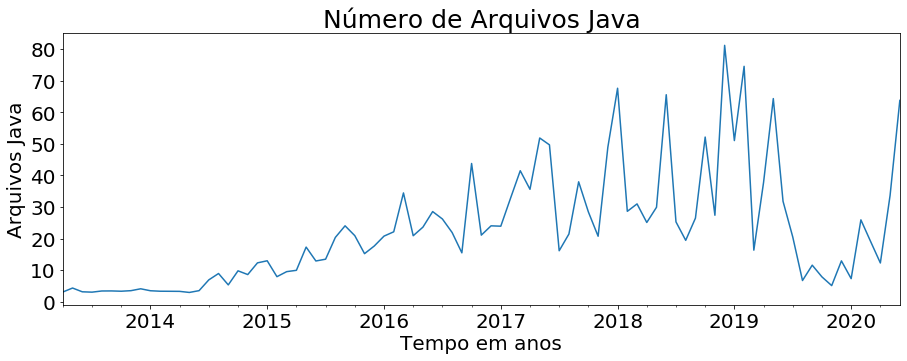

In [95]:
subplot = df["numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Número de Arquivos Java", fontsize=25)
subplot.set_ylabel("Arquivos Java", fontsize=20)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/arquivosJava.pdf",bbox_inches = 'tight')

### Gráfico do número linhas de código por arquivo Java

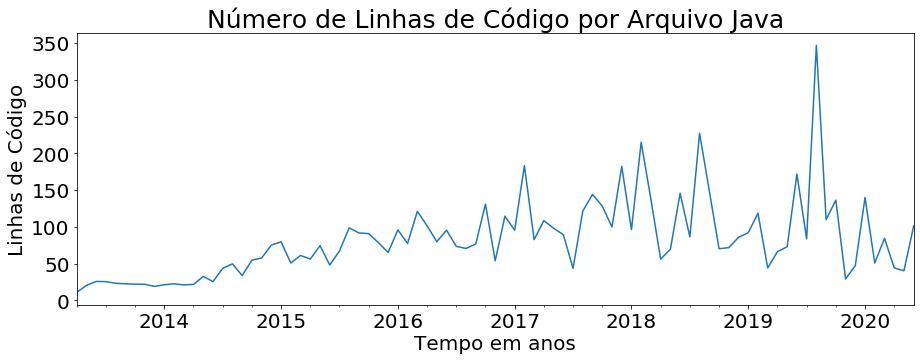

In [96]:
subplot = df["countLineCode/numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Número de Linhas de Código por Arquivo Java", fontsize=25)
subplot.set_ylabel("Linhas de Código", fontsize=20)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/loc.pdf",bbox_inches = 'tight')

### Gráfico da complexidade por método

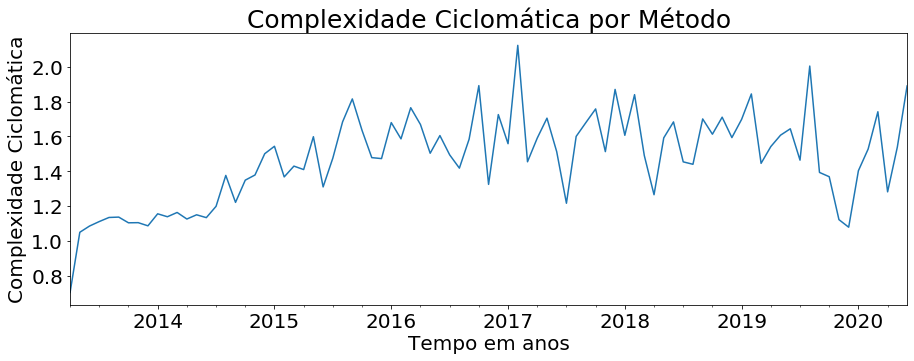

In [97]:
subplot = df["SumCyclomaticStrict/CountDeclMethod"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Complexidade Ciclomática por Método", fontsize=25)
subplot.set_ylabel("Complexidade Ciclomática", fontsize=20)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/cc.pdf",bbox_inches = 'tight')

### Gráfico da readability por arquivo Java

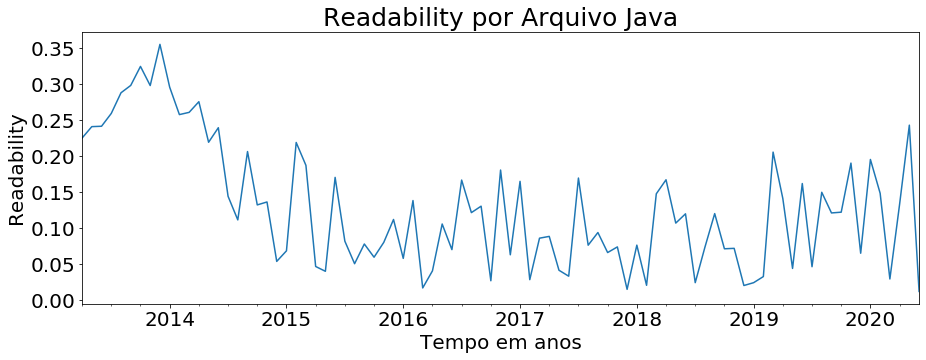

In [98]:
subplot = df["readability"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Readability por Arquivo Java", fontsize=25)
subplot.set_ylabel("Readability", fontsize=20)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/readability.pdf",bbox_inches = 'tight')

## Teste de Mann Kendall

Hipótese nula: Não há tendência monotonica.

Hipótese alternativa: Existe uma tendência.

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [99]:
pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pymannkendall as mk

### Teste de tendência (MannKendallTest) para número de arquivos Java

In [101]:
mk.original_test(normalized_df["numberOfJavaFiles"])

Mann_Kendall_Test(trend='increasing', h=True, p=2.0618173834918707e-11, z=6.701577996875844, Tau=0.4889067094359797, s=1829.0, var_s=74404.33333333333, slope=0.005388617602332612, intercept=-0.007402218813242073)

### Teste de tendência (MannKendallTest) para número linhas de código por arquivo Java

In [102]:
mk.original_test(normalized_df["countLineCode/numberOfJavaFiles"])

Mann_Kendall_Test(trend='increasing', h=True, p=8.260055750497486e-09, z=5.763063791624084, Tau=0.42047580860732425, s=1573.0, var_s=74404.33333333333, slope=0.0033990105861291184, intercept=0.04558623766206954)

### Teste de tendência (MannKendallTest) para complexidade por método

In [103]:
mk.original_test(normalized_df["SumCyclomaticStrict/CountDeclMethod"])

Mann_Kendall_Test(trend='increasing', h=True, p=2.445497704339772e-07, z=5.161828128884676, Tau=0.37663726276396686, s=1409.0, var_s=74404.33333333333, slope=0.0041426374933560784, intercept=0.3788684675620806)

### Teste de tendência (MannKendallTest) para readability por arquivo Java

In [104]:
mk.original_test(normalized_df["readability"])

Mann_Kendall_Test(trend='decreasing', h=True, p=4.155354602919381e-05, z=-4.098667505747918, Tau=-0.2991178829190056, s=-1119.0, var_s=74404.33333333333, slope=-0.004597676681067195, intercept=0.5118290630579906)

### Teste de tendência (MannKendallTest) para número de perguntas no SO

In [105]:
mk.original_test(normalized_df["count_questions"])

Mann_Kendall_Test(trend='increasing', h=True, p=0.00015208047793358048, z=3.7876473780909556, Tau=0.2753274525527934, s=1030.0, var_s=73806.0, slope=0.005649717514124295, intercept=0.15706214689265535)

## Teste de Normalidade

Hipótese nula: A população tem distribuição normal

Hipótese alternativa: A população não tem distribuição normal

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [106]:
from scipy import stats

### Teste de normalidade (Shapiro-Wilk) para número de arquivos Java

In [107]:
stats.shapiro(normalized_df["numberOfJavaFiles"])

(0.8799844980239868, 8.166693419298099e-07)

### Teste de normalidade (Shapiro-Wilk) para número linhas de código por arquivo Java

In [108]:
stats.shapiro(normalized_df["countLineCode/numberOfJavaFiles"])

(0.8672690987586975, 2.639621072830778e-07)

### Teste de normalidade (Shapiro-Wilk) para complexidade por método

In [109]:
stats.shapiro(normalized_df["SumCyclomaticStrict/CountDeclMethod"])

(0.9797495007514954, 0.19025810062885284)

### Teste de normalidade (Shapiro-Wilk) para readability por arquivo Java

In [110]:
stats.shapiro(normalized_df["readability"])

(0.9361428022384644, 0.00033060548594221473)

### Teste de normalidade (Shapiro-Wilk) para número de perguntas no SO

In [111]:
stats.shapiro(normalized_df["count_questions"])

(0.9415321946144104, 0.000661201891489327)

## Teste de Correlação

Hipótese nula: os dois conjuntos de dados não são correlacionados

Hipótese alternativa: os dois conjuntos de dados são correlacionados

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [112]:
from scipy import stats

### Teste de correlação (Spearman) questões do SO e para número de arquivos Java

In [113]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["numberOfJavaFiles"])

SpearmanrResult(correlation=0.6346051138311158, pvalue=4.109435830016668e-11)

### Teste de correlação (Spearman) para questões do SO e número linhas de código por arquivo Java

In [114]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["countLineCode/numberOfJavaFiles"])

SpearmanrResult(correlation=0.6416925572795776, pvalue=2.125864837319397e-11)

### Teste de correlação (Spearman) para questões do SO e complexidade por método

In [122]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["SumCyclomaticStrict/CountDeclMethod"])

SpearmanrResult(correlation=0.6207411599370923, pvalue=1.4223474829387407e-10)

### Teste de correlação (Spearman) para questões do SO e readability por arquivo Java

In [116]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["readability"])

SpearmanrResult(correlation=-0.5494917768313291, pvalue=3.552448376390281e-08)

## Gráficos StackOverflow X Métricas

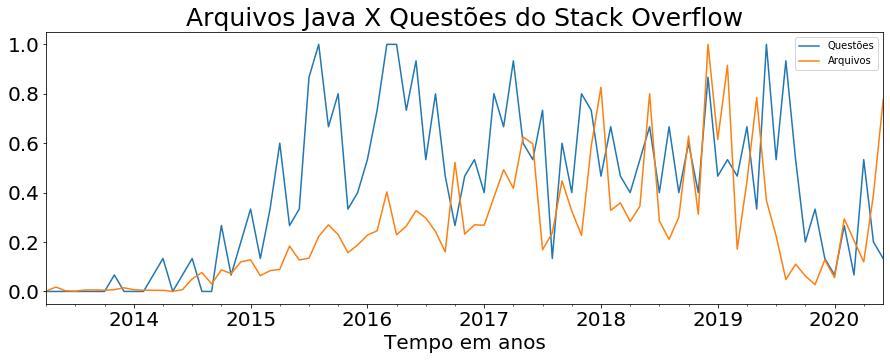

In [117]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questões")
subplot = normalized_df["numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20, legend=True, label="Arquivos")
subplot.set_title("Arquivos Java X Questões do Stack Overflow", fontsize=25)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/arquivosVsQuestões.pdf",bbox_inches = 'tight')

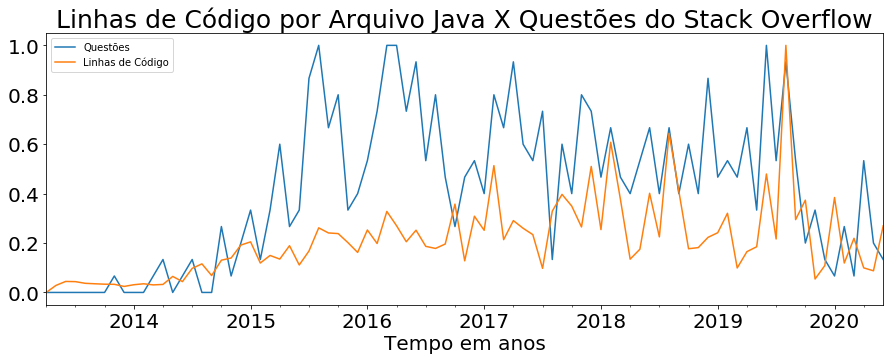

In [118]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questões")
subplot = normalized_df["countLineCode/numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20, legend=True, label="Linhas de Código")
subplot.set_title("Linhas de Código por Arquivo Java X Questões do Stack Overflow", fontsize=25)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/linhasVsQuestões.pdf",bbox_inches = 'tight')

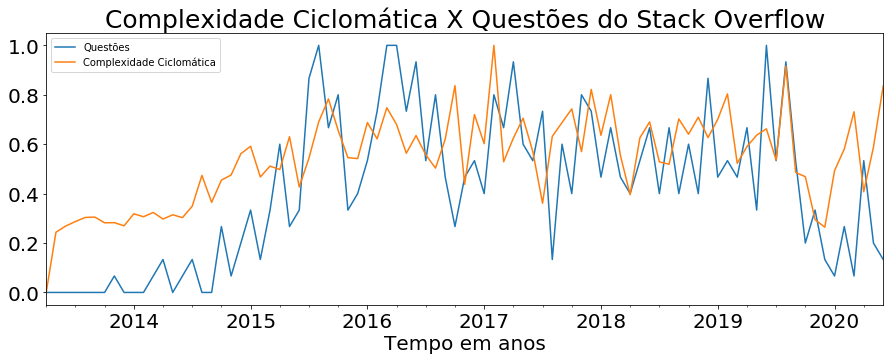

In [119]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questões")
subplot = normalized_df["SumCyclomaticStrict/CountDeclMethod"].plot(figsize=(15,5), fontsize=20, legend=True, label="Complexidade Ciclomática")
subplot.set_title("Complexidade Ciclomática X Questões do Stack Overflow", fontsize=25)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/ccVsQuestões.pdf",bbox_inches = 'tight')

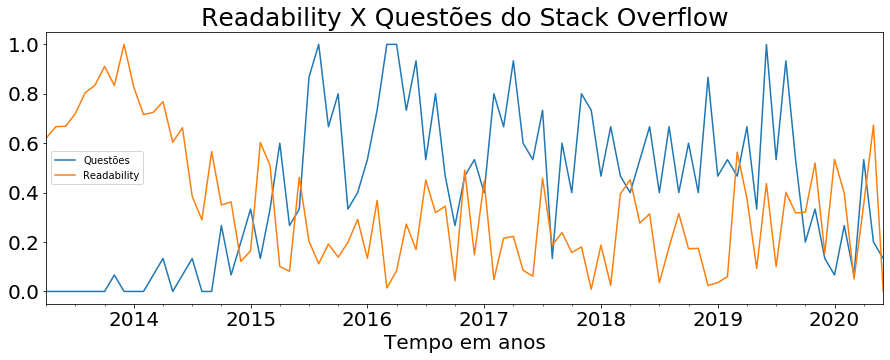

In [120]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questões")
subplot = normalized_df["readability"].plot(figsize=(15,5), fontsize=20, legend=True, label="Readability")
subplot.set_title("Readability X Questões do Stack Overflow", fontsize=25)
subplot.set_xlabel("Tempo em anos", fontsize=20)
subplot.figure.savefig("SBCARS2020/readabilityVsQuestões.pdf",bbox_inches = 'tight')

***Obs1: no teste de correlaçao o primeiro valor da tupla é o coeficiente da correlação e o segundo valor da tupla é o p-value***

***Obs2: Todos os dados foram normalizados***